Pente : 301269.52366213384
u(Pente) : 5974.365026667322


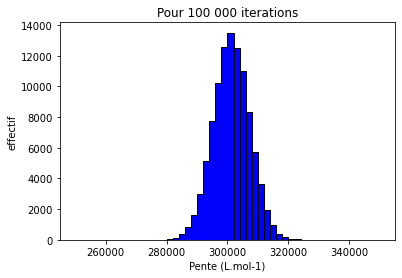

Ordonnee à l origine : -0.03173600645733006
u(Ordonnée à l origine) 0.002740232250429864


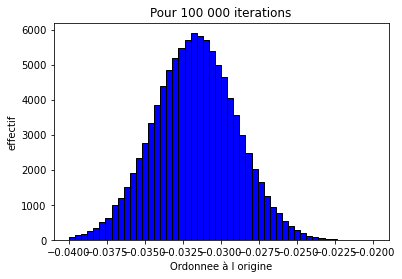

In [1]:
import numpy as np

from matplotlib import pyplot



##########################################################################

#Procedure Regression Linéaire ; tableaux np X et Y

def RegLin(X,Y):

    N=len(X)

    moyX=sum(X)/N

    moyY=sum(Y)/N

    pente=sum((X-moyX)*(Y-moyY))/(sum((X-moyX)**2))

    ordor=moyY-pente*moyX

    return [pente,ordor]



##########################################################################

#Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]

def Alea(L):

    tirage=np.random.normal()   #Tirage entre -infini et +infini (loi normale)

    return L[0]+L[1]*tirage

##########################################################################

   

##########################################################################

#Entrées (groupe 1)

m=[297.e-3,1.e-3]

M=[1160.45,0.01]

Vf1=[1.0000,2.3e-4]

Vp=[5.00e-3,1.7e-5]

Vf2=[1.0000,2.3e-4]

Dilutions=[10e-3,7.5e-3,5.00e-3,3e-3,1.00e-3]

Ajustements=[0,2.5e-3,5.00e-3,7e-3,9.00e-3]

DeltaBurette=0.05e-3

Absorbance=[367e-3,245e-3,161e-3,65e-3,25e-3]

ErelSpectro=0.02

##########################################################################



##########################################################################

#Préparation des listes avec incertitudes

Dilu=[]

for k in range(len(Dilutions)):

    Dilu.append([Dilutions[k],DeltaBurette])



Ajust=[]

for k in range(len(Dilutions)):

    if Ajustements[k]==0:

        Ajust.append([Ajustements[k],0])

    else:

        Ajust.append([Ajustements[k],DeltaBurette])



A=[]

for k in range(len(Dilutions)):

    A.append([Absorbance[k],Absorbance[k]*ErelSpectro])

##########################################################################



##########################################################################

#Méthode de Monte Carlo pour trouver la pente, l'ordonnée à l'origine et

#les incertitudes-type

LPente,LOrdOr=[],[]

Iteration=100000



for j in range(Iteration):

    AleaCm=Alea(m)/(Alea(M)*Alea(Vf1))

    AleaC0=AleaCm*Alea(Vp)/Alea(Vf2)

    AleaC=[]

    AleaA=[]

    for k in range(len(Dilutions)):

        AleaC.append(AleaC0/(1+Alea(Ajust[k])/Alea(Dilu[k])))

        AleaA.append(Alea(A[k]))



    Pente=RegLin(np.array(AleaC),np.array(AleaA))[0]

    OrdOr=RegLin(np.array(AleaC),np.array(AleaA))[1]

    LPente.append(Pente)

    LOrdOr.append(OrdOr)



MoyPente=sum(LPente)/Iteration

MoyOrdOr=sum(LOrdOr)/Iteration

uPente=(1/(Iteration-1)*sum((np.array(LPente)-MoyPente)**2.))**0.5

uOrdOr=(1/(Iteration-1)*sum((np.array(LOrdOr)-MoyOrdOr)**2.))**0.5



print('Pente :',MoyPente)

print('u(Pente) :',uPente)

pyplot.hist(LPente, range = (250000, 350000), bins = 50, color = 'blue', edgecolor = 'black')

pyplot.xlabel('Pente (L.mol-1)')

pyplot.ylabel('effectif')

pyplot.title('Pour 100 000 iterations')

pyplot.show()



print('Ordonnee à l origine :',MoyOrdOr)

print('u(Ordonnée à l origine)',uOrdOr)

pyplot.hist(LOrdOr, range = (-0.0400, -0.020), bins = 50, color = 'blue', edgecolor = 'black')

pyplot.xlabel('Ordonnee à l origine')

pyplot.ylabel('effectif')

pyplot.title('Pour 100 000 iterations')

pyplot.show()